In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Reading the file**

In [4]:
df = pd.read_csv("/kaggle/input/boston-housing-dataset/HousingData.csv")

# **Checking for the null values**

In [5]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

# **Removing the rows with null values**

In [7]:
df.dropna(inplace = True)

In [8]:
df.shape

(394, 14)

In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

# **Heatmap**

<Axes: >

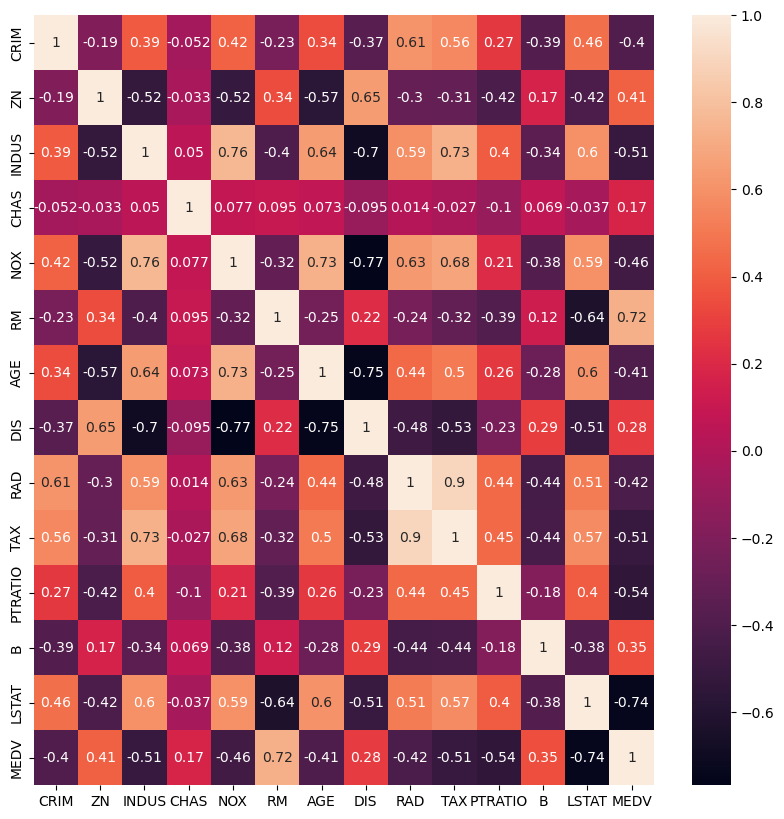

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr() , annot = True)

# **Input & Output variables**

In [14]:
x = df.drop('MEDV',axis = 1)
y = df['MEDV']

# **Splitting the training and testing data**

In [15]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,train_size=0.7)

In [16]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((275, 13), (119, 13), (275,), (119,))

# **SVM model**

In [17]:
from sklearn.svm import SVR

In [18]:
support_v = SVR(kernel ="rbf")
support_v.fit(x_train , y_train)

SVR()

In [19]:
predictions = support_v.predict(x_test)
print(predictions)

[21.15039006 25.02144697 23.89567882 14.02337808 20.58710311 15.17304695
 23.05007334 15.07443207 22.21163294 19.43565875 23.57599885 23.28054797
 22.9173507  23.17816346 23.75831101 13.35800836 23.04895244 24.19580772
 22.9385496  15.32766301 25.40079259 21.50242754 24.48310444 23.15475145
 16.40459963 24.44779753 22.32635839 20.0120315  23.10532741 23.83722408
 23.72506466 16.29240655 24.36828923 23.24531919 23.39821182 15.82015951
 13.40881916 20.77160525 23.98594288 24.55607697 22.12075449 23.43074174
 22.73969343 13.43718779 16.00358651 24.94489414 15.83928276 24.8057571
 19.36830193 24.60162737 15.9741271  19.66044075 16.05815625 22.37468546
 22.95240571 22.95742796 16.09839238 23.48971239 19.55218595 13.31885013
 20.85083935 13.27960333 15.95613068 21.96594107 14.96204346 20.73736037
 21.7566305  16.10528642 22.69807366 24.23542203 22.42828691 23.48220686
 22.77576379 20.30957844 16.04158239 24.82995119 21.89621241 22.21154505
 23.27215193 24.22461183 16.07093097 23.22006111 13.

In [20]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test , predictions)

59.37528190869432

Text(0.5, 1.0, 'Support Vector Regression')

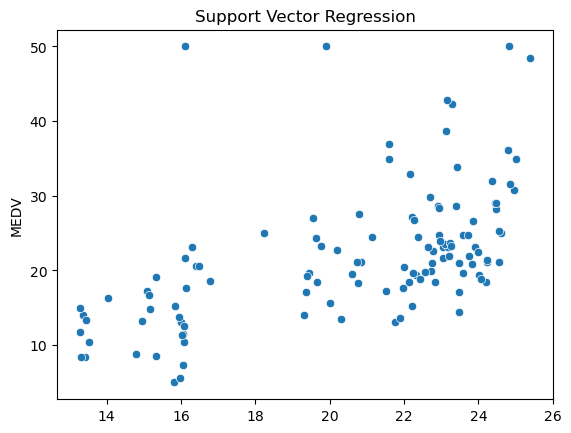

In [21]:
f = sns.scatterplot(y = y_test,x = predictions)
f.set_title("Support Vector Regression")